In [32]:
import torch
import torch.nn.init
from torchsummary import summary as summary_
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data
import torchvision.datasets as datasets
from matplotlib import pyplot as plt
import sys
import warnings
warnings.filterwarnings(action='ignore')

In [33]:
file_path = 'clothes/'

In [34]:
class VGG11(nn.Module):
    def __init__(self,init_weights: bool = True):
        super(VGG11, self).__init__()
        self.convnet = nn.Sequential(
            # Input Channel (RGB: 3)
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), 
            
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), 

            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1, stride=1),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2), 
        )

        self.fclayer = nn.Sequential(
            nn.Linear(512 * 8 * 8, 4096),
            nn.LeakyReLU(0.2),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.LeakyReLU(0.2),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 5),
        )
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.convnet(x)
        x = torch.flatten(x, 1)
        x = self.fclayer(x)
        return x

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = VGG11().to(device)

In [36]:
model.load_state_dict(torch.load('model20.pt'))
model.eval()

VGG11(
  (convnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.2)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.2)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.2)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): LeakyReLU(negative_slope=0.2)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): LeakyReLU(negative_slope=0.2)
    (15): MaxPool2d

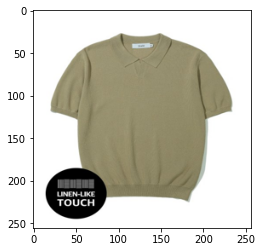

2 2


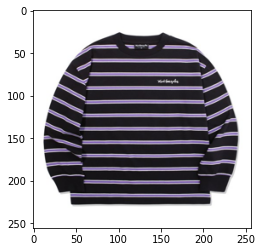

2 2


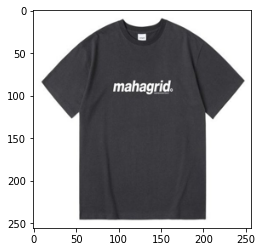

2 2


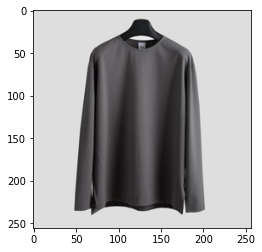

1 2


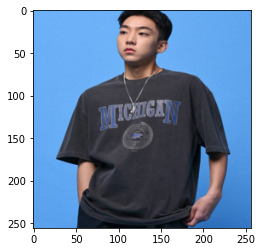

2 2


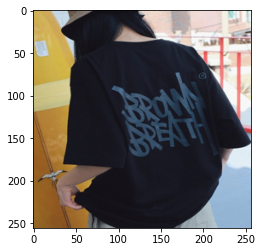

4 2


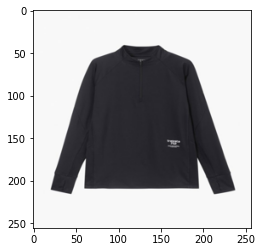

2 2


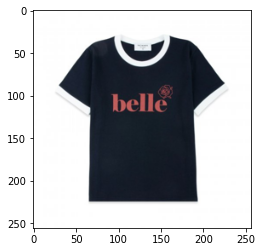

2 2


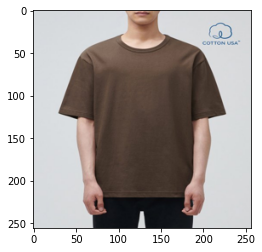

1 2


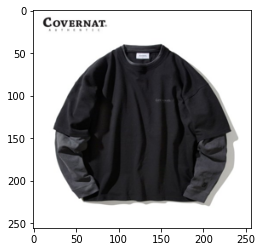

2 2


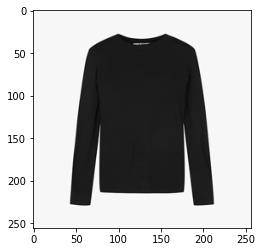

2 2


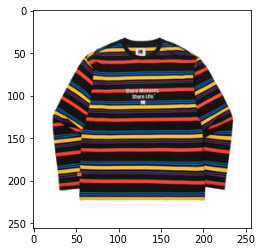

2 2


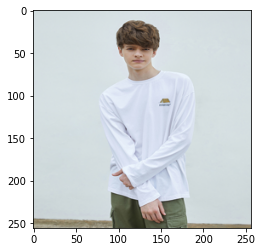

2 2


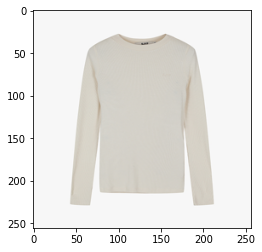

2 2


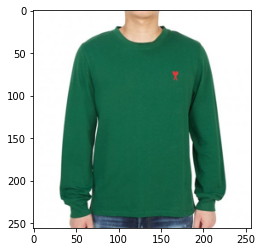

2 2


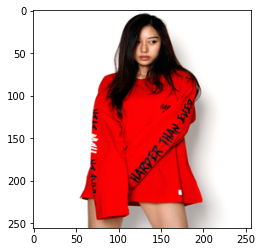

1 2


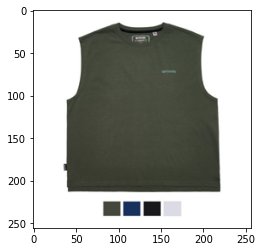

2 2


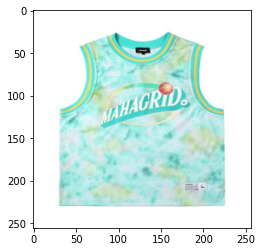

2 2


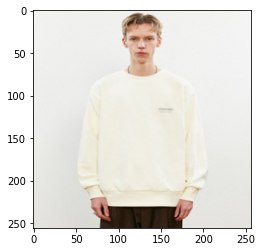

2 2


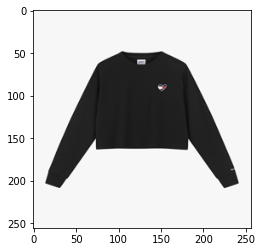

2 2


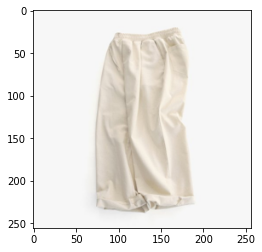

3 3


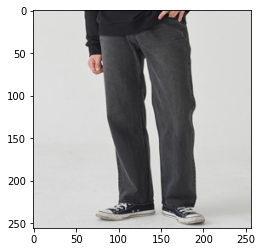

4 3


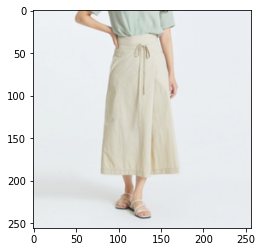

3 3


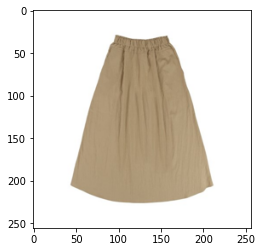

3 3


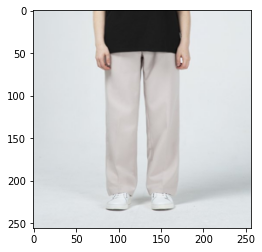

3 3


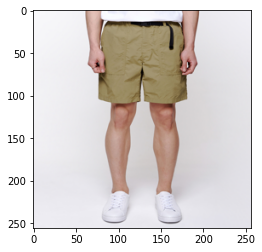

2 3


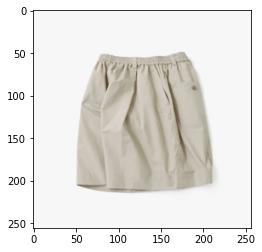

2 3


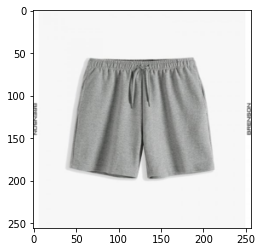

3 3


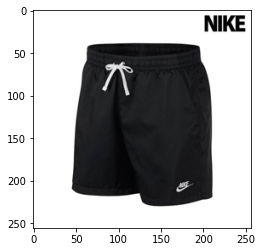

1 3


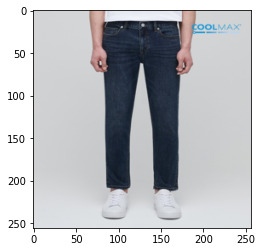

3 3


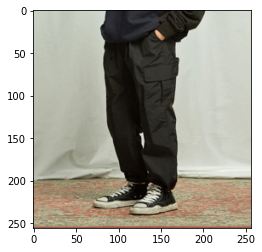

3 3


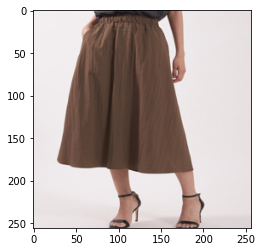

3 3


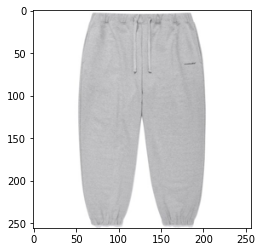

3 3


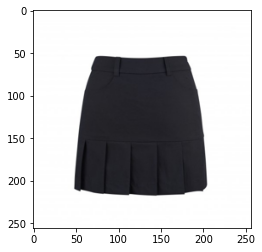

2 3


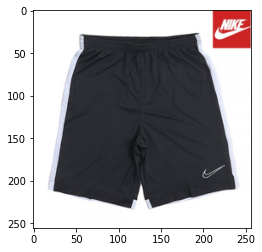

4 3


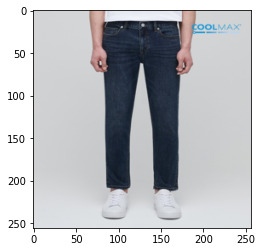

3 3


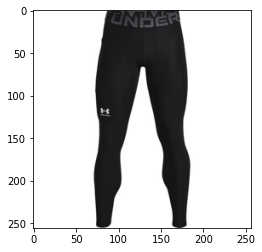

3 3


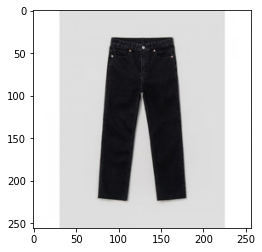

3 3


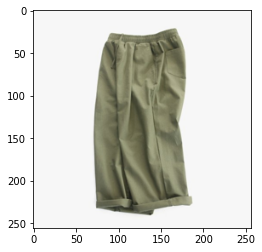

3 3


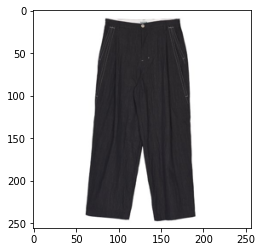

3 3


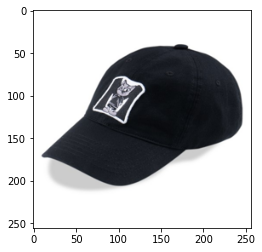

4 0


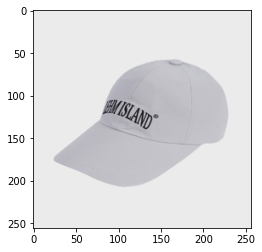

4 0


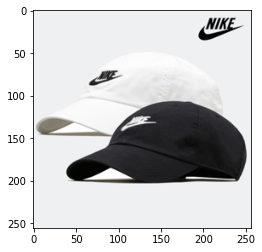

0 0


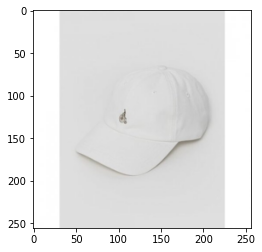

4 0


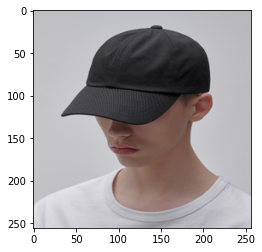

1 0


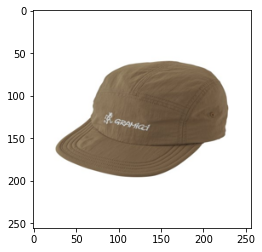

1 0


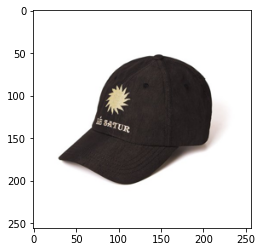

4 0


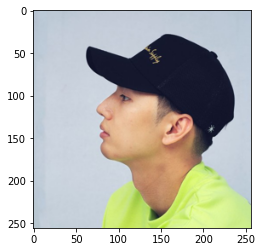

4 0


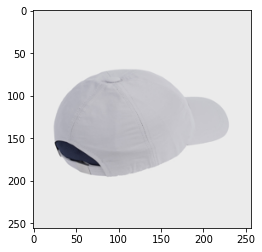

1 0


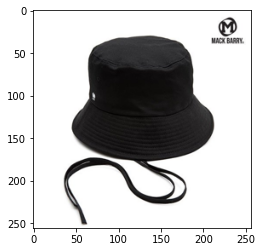

4 0


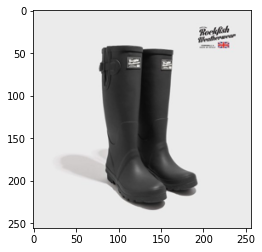

1 4


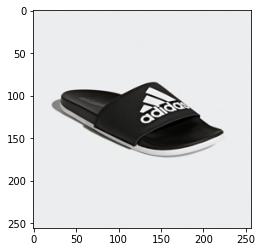

0 4


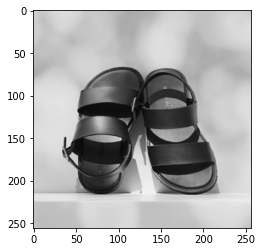

1 4


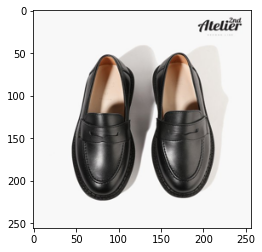

1 4


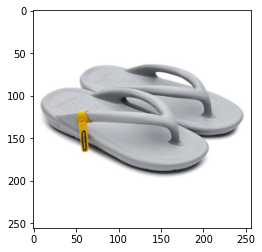

1 4


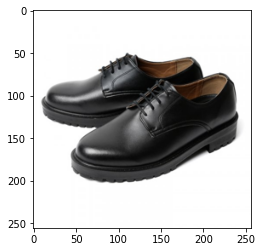

1 4


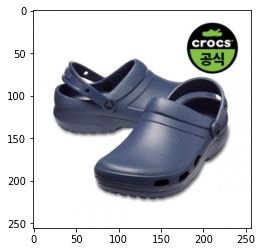

1 4


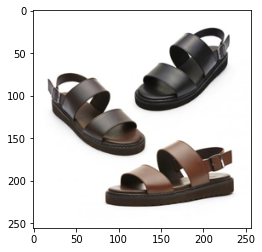

0 4


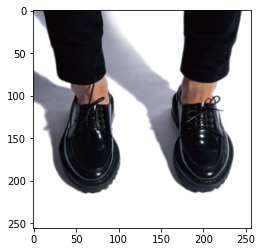

2 4


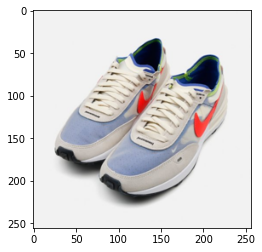

1 4


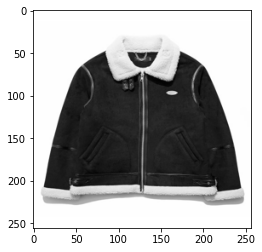

1 1


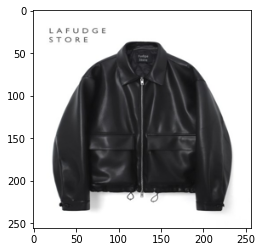

2 1


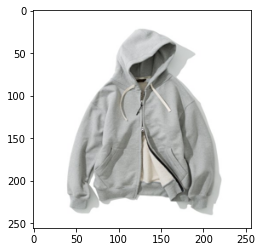

2 1


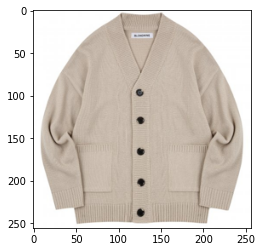

2 1


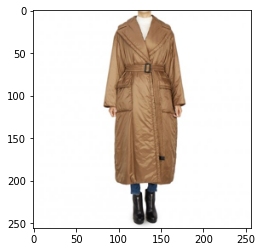

1 1


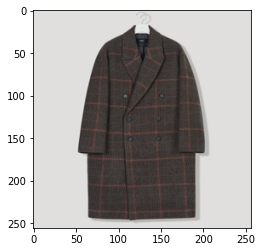

1 1


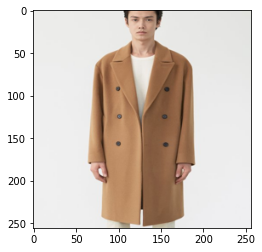

1 1


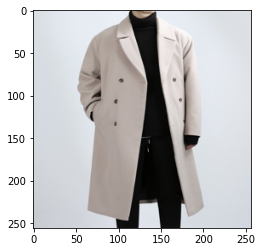

1 1


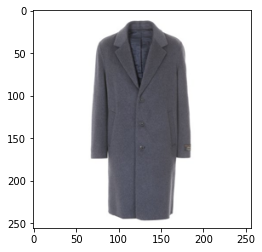

1 1


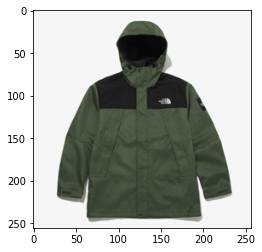

1 1


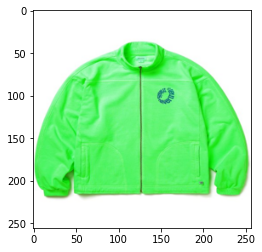

1 1


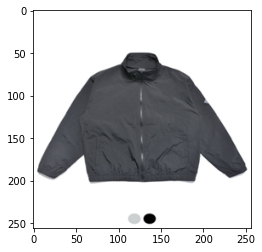

1 1


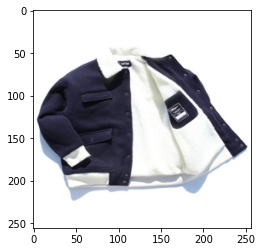

2 1


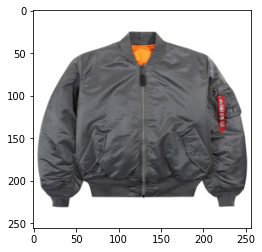

1 1


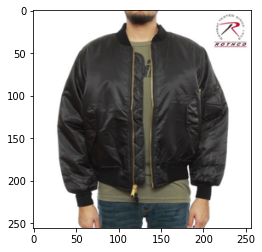

2 1


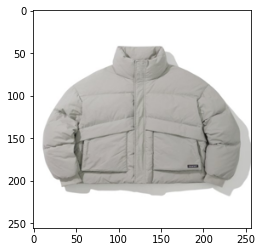

2 1


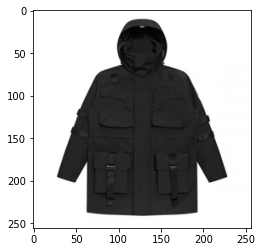

1 1


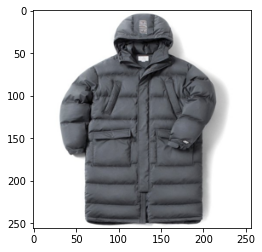

1 1


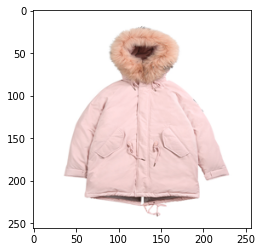

1 1


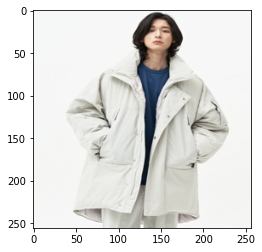

1 1


In [68]:
from torchvision.transforms import ToTensor
label = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
accuracy = [0,0,0,0,0]

for i in range(80):
    X_test = torch.empty(0,3,256,256)
    img = Image.open(file_path + f'{i+1}'+'.jpg')
    img = img.resize((256, 256))
    plt.imshow(img)
    plt.show()
    data = ToTensor()(img).unsqueeze(0)
    X_test =torch.cat([X_test,data],dim=0)
    with torch.no_grad(): 
        X_test = X_test.to(device)
        result = model(X_test)
    result = torch.argmax(result, 1)
    print('%d %d'%(result[0], label[i]))
    if(result[0] == label[i]):
        accuracy[label[i]]+=1

In [69]:
print('accuracy for hat : %d %%' %(accuracy[0] / 10 * 100))
print('accuracy for outer : %d %%' %(accuracy[1] / 20 * 100 ))
print('accuracy for top : %d %%' %(accuracy[2]/ 20 * 100))
print('accuracy for bottom : %d %%' %(accuracy[3] / 20 * 100))
print('accuracy for shoes : %d %%' %(accuracy[4] / 10 * 100))

accuracy for hat : 10 %
accuracy for outer : 70 %
accuracy for top : 80 %
accuracy for bottom : 70 %
accuracy for shoes : 0 %
